# Équations de Lotka-Voltera

## Dépendances logicielles 

In [1]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [2]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

## Paramètres

In [3]:
global alpha
alpha = 1.5
global beta
beta = 1.5
global gamma
gamma = 1.5
global delta
delta = 1.5

## Questions

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de la manière suivante :

$\left \{
\begin{array}{rcl}
\dot{x}_1 &=& x_1(\alpha - \beta x_2) \\
\dot{x}_2 &=& -x_2(\gamma - \delta x_1)
\end{array}
\right.$

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

#### Question 1

Donner une interprétation physique à chaque terme de la dynamique.
Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\bar{x}$ $\in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Que peut-on dire de leur stabilité à ce stade ?

##### Réponse:

* $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement.
* $\dot{x}_1$ et $\dot{x}_2$ désignent la variation au cours du temps des populations de proies et de prédateurs respectivement.
* $\alpha$ représente le taux de reproduction des proies
* $\beta$ représente le taux de mortalité des proies en rapport avec les prédateurs (proies mangées)
* $\gamma$ représente le taux de mortalité des prédateurs
* $\delta$ représente le taux de reproduction des prédateurs (selon le nombre de proies mangées)

Soit $f:\begin{pmatrix}
x_1 \\
x_2 
\end{pmatrix} \mapsto \begin{pmatrix}
x_1(\alpha - \beta x_2) \\
-x_2(\gamma - \delta x_1) 
\end{pmatrix}$, on a alors $\dot{x}=f(x)$.Les points d'équilibre s'obtiennent donc en résolvant l'équation $f(x)=0$: on obtient $\fbox{$x_0=\begin{pmatrix}
0 \\
0 
\end{pmatrix}$}$ ou $\fbox{$\bar{x}=\begin{pmatrix}
\frac{\gamma}{\delta} \\
\frac{\alpha}{\beta} 
\end{pmatrix}$}$

*Pour la stabilité des solutions*, on calcule la matrice jacobienne de $f$: $J_f(x)=\begin{pmatrix}
\alpha -\beta x_2 & -\beta x_1 \\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}$

D'où $J_f(x_0)= \begin{pmatrix}
\alpha & 0 \\
0 & -\gamma 
\end{pmatrix}$, on a deux valeurs propres réelles dont une positive: **$x_0$ est un point d'équilibre instable**

et $J_f(\bar{x})= \begin{pmatrix}
0 & -\frac{\beta\gamma}{\delta} \\
\frac{\delta\alpha}{\beta} & 0
\end{pmatrix}$; ici on trouve deux valeurs propres imaginaires pures $\pm i\sqrt(\alpha\gamma)$, donc **on ne peut pas conclure sur la stabilité de $\bar{x}$**.



#### Question 2

A l’aide des fonctions *meshgrid* et *quiver*, visualiser graphiquement le
champ de vecteurs. Intuiter le comportement des solutions. On pourra
aussi utiliser *streamplot* pour visualiser le portrait de phase.

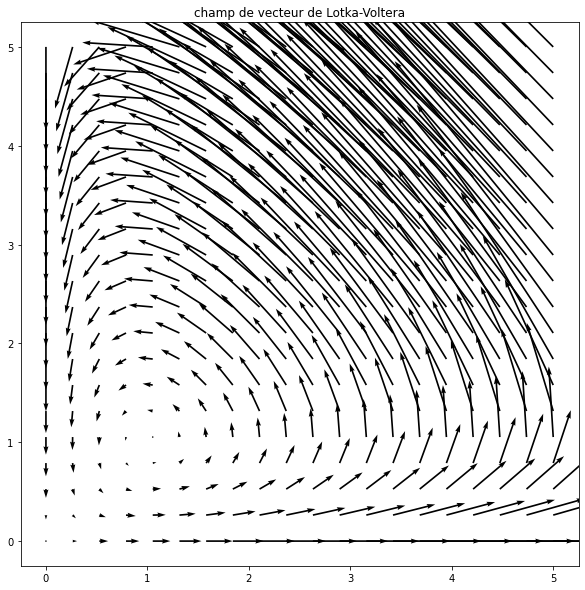

In [4]:
def J_f(x,y,dt): #notre jacobienne
    return np.array([[1 - dt*(alpha - beta*y), dt*beta*x], [-dt*delta*y, 1 + dt*(gamma - delta*x)]])

def f(t,x): #la fonction f
    return np.array([x[0] * (alpha - beta*x[1]), -x[1] * (gamma - delta*x[0])])

x = np.linspace(0, 5, 20)
y = np.linspace(0, 5, 20)
X, Y = np.meshgrid(x,y)
R = f(0, (X, Y))

#tracé du champ de vecteurs
plt.quiver(X, Y, R[0], R[1], scale = 50); 
plt.title('champ de vecteur de Lotka-Voltera');

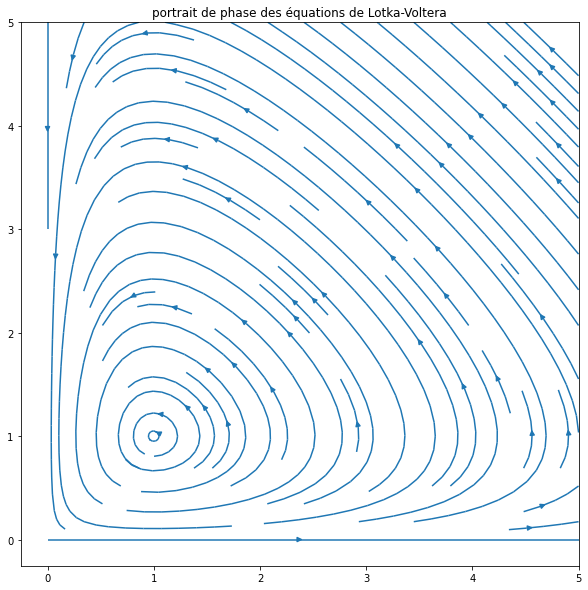

In [5]:
#tracé du portrait de phase
plt.streamplot(X, Y, R[0], R[1]); 
plt.title("portrait de phase des équations de Lotka-Voltera");

#### Question 3

Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition.

##### Réponse:

$\mathbb{R}_{>0}$ est un ouvert de $\mathbb{R}$ et $f$ est continûment différentiable sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ (on a calculé sa jacobienne, dont les composantes sont continues). Donc, d'après le *théorème de Cauchy-Lipschitz*, $\forall (x_{1,0},x_{2,0})\in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$, il existe une unique solution maximale dans $S_f(x_{1,0},x_{2,0})$.

Prenons $(x_{1,0},x_{2,0})\in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. D'après le portrait de phase tracé Q.2, les droites $x=0$ et $y=0$ sont solutions dans $S_f(x_{1,0},x_{2,0})$.
Supposons alors par l'absurde que la solution initialisée en $(x_{1,0},x_{2,0})$ ne reste pas dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$: alors, cette solution croiserait l'une des deux droites $x=0$ ou $y=0$ en au moins un point $M$ ; et donc il existerait deux solutions maximales initialisées en $M$, ce qui contredit le théorème de Cauchy-Lipschitz énoncé précédemment.

Donc, **toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition.**



#### Question 4

On considère la fonction $H(x_1, x_2) = \delta x_1 − \gamma \ln x_1 + \beta x_2 − \alpha \ln x_2$ définie sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Calculer la dérivée de H le long des solutions initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.

##### Réponse:

Soit $(x_1,x_2)\in \mathbb{R}_{>0}\times \mathbb{R}_{>0}$: $H$ est dérivable et $\nabla H(x_1,x_2)= \begin{pmatrix} 
\delta-\frac{\gamma}{x_1} \\
\beta - \frac{\alpha}{x_2}
\end{pmatrix}$. On peut alors remarquer que $\forall x\in\mathbb{R}_{>0}\times\mathbb{R}_{>0}$, $\langle\nabla H(x_1,x_2),f(x_1,x_2)\rangle =x_1(\delta-\frac{\gamma}{x_1})(\alpha-\beta x_2)+x_2(\beta-\frac{\alpha}{x_2})(\delta x_1 -\gamma)=0=\frac{d}{dt} H(x_1,x_2)$.

Ainsi, $\fbox{H'=0}$: $H$ se conserve le long des solutions initialisées dans $\mathbb{R}_{>0}\times \mathbb{R}_{>0}$.

On peut alors appliquer le *théorème du domaine maximal d'existence*: les hypothèses sont les mêmes que dans la question précédente, et le théorème nous indique que toute solution maximale initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur un intervalle ouvert $]t_m^-;t_m^+[$. 
Supposons que $t_m^-$ est fini: d'après le théorème, on aurait alors $(x_1,x_2)$ qui sort de tout fermé borné de $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ (soit sur la frontière, soit divergence). Or, on a vu que toute solution maximale initialisée dans $\mathbb{R}_{>0}\times \mathbb{R}_{>0}$ suit les courbes de niveau de $H$ (cf. Q.5 pour vérifier), donc est comprise dans un fermé borné de $\mathbb{R}_{>0}\times \mathbb{R}_{>0}$.

On aboutit à une absurdité: ainsi, $t_m^-=-\infty$. De même, on obtient $t_m^+=+\infty$. D'où $]t_m^-;t_m^+[=\mathbb{R}$. Et donc, **toute solution maximale initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.**

#### Question 5

Représenter les courbes de niveau de $H$. Où se trouve $\bar{x}$ ? Qu’en conclut-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.

c:\users\remic\miniconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


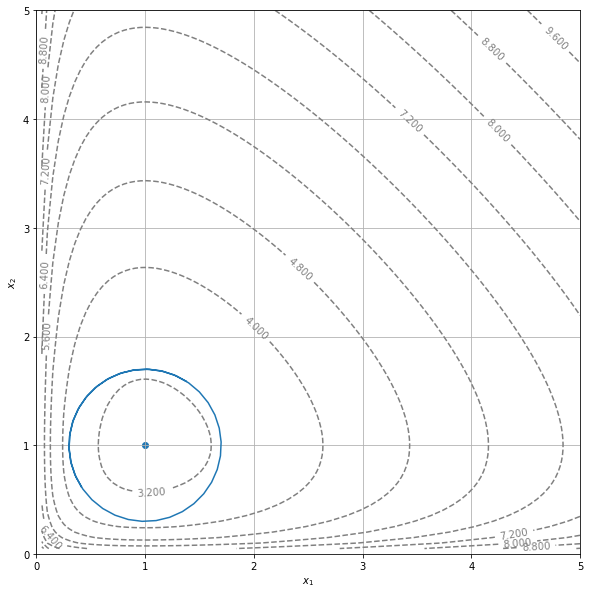

In [6]:
def H(x1, x2): #la fonction H
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

# On trace les courbes de niveau de H, \bar{x} est placé (cf. réponse juste ci-dessous)
display_contour(H, x=np.linspace(0, 5.0, 100), y=np.linspace(0, 5.0, 100), levels=10);
plt.scatter(1,1);
plt.plot(0.7*np.cos(np.linspace(1,10))+1, 0.7*np.sin(np.linspace(1,10))+1);

##### Réponse:

On a, dans les conditions prises ici (tous les coefficients égaux), $\bar{x}=(1,1)$. 

Comme évoqué Q.4, les solutions suivent les courbes de niveau de $H$: en effet, $H$ se conserve le long des solutions initialisées dans $\mathbb{R}_{>0}\times \mathbb{R}_{>0}$.

Considérons un cercle centré sur $\bar{x}$ (tracé en bleu): si l'on prend une solution initialisée sur la courbe de niveau 3.2 de $H$, on voit que les solutions dans $S_f$ restent dans le cercle quel que soit $t$: ainsi, **$\bar{x}$ est stable** (par définition de la stabilité).

#### Question 6

Coder une fonction du type *solve_euler_explicit(f, x0, dt, t0, tf)* prenant en entrée une fonction f : $\mathbb{R}\times\mathbb{R}^n\to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t_j$ et de la solution $x_j$ du schéma d’Euler explicite appliqué à $\dot{x} = f(t, x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt\to 0$. Comment visualiser graphiquement l’ordre de convergence ?

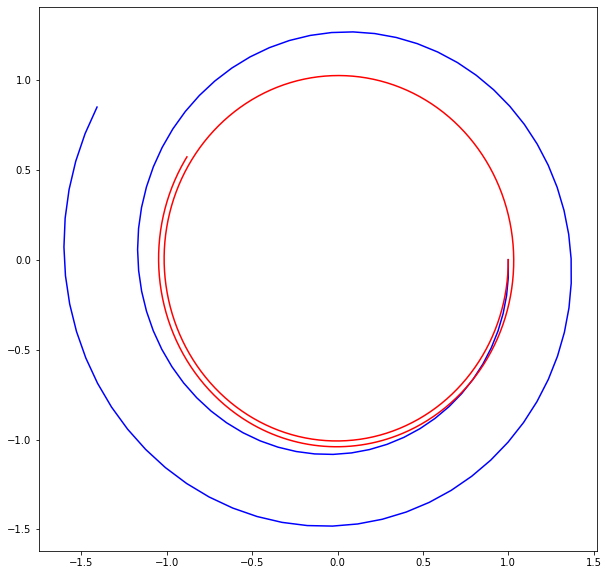

In [7]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    x = np.array([x0])
    T = np.arange(t0, tf, dt) #liste des temps
    for tps in T:
        x1 = x0 + dt*f(tps,x0) #Schéma d'Euler explicite
        x = list(x)
        x.append(x1)
        x = np.array(x)
        x0 = x1 #réinitialisation pour l'incrément suivant
    return T, x

# On teste notre fonction sur un cercle
def cercle(t,x):
    return np.array([x[1], -x[0]])

    ##Tracé pour un pas de temps assez élevé, en bleu
T, x = solve_euler_explicit(cercle, [1,0], 0.1, 0, 10)
x = x.transpose()
plt.plot(x[0], x[1], 'b');

    ##Tracé pour un pas de temps plus faible, en rouge
T, x = solve_euler_explicit(cercle, [1,0], 0.01, 0, 10)
x = x.transpose()
plt.plot(x[0], x[1], 'r');

# On voit que quand dt tend vers 0, on tend vers la solution exacte (le cercle); mais le temps de process est plus long !

##### Réponse

Pour visualiser l'ordre de convergence, il suffit de tracer la courbe $log(erreur)=f(dt)$, où $erreur$ représente la différence entre la vraie solution et celle donnée par notre schéma d'Euler.

On a choisi de le faire pour 5 pas de temps différents.

On trouve une pente de 1: **la convergence est linéaire**.

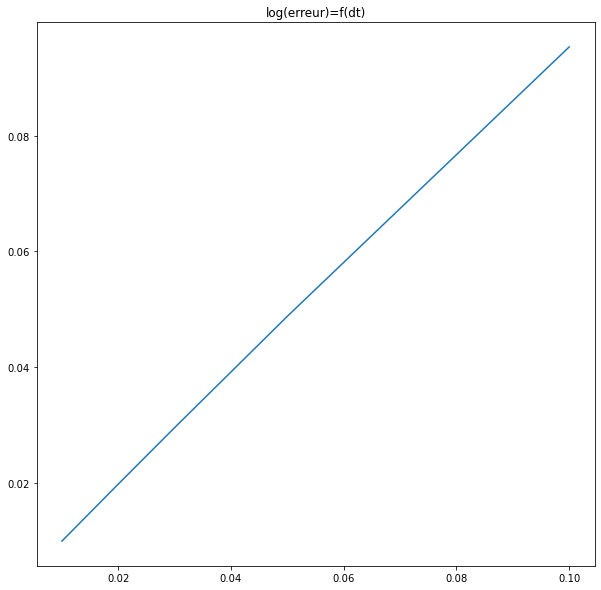

In [8]:
logerreur=[]
dt = [0.1, 0.05, 0.03, 0.02, 0.01] #différents points de notre courbe

for pas in dt:
    T, x = solve_euler_explicit(cercle, [1,0], pas, 0, 10) #on fixe arbitrairement le point de départ à (1,0)
    
#construction de la solution théorique:
    x0ref = x[0]
    x1ref = [] 
    for elt in x[0]: #pour chaque élément de la liste d'abscisses, on calcule l'ordonnée "théorique" correspondante
        x1ref.append(np.sqrt((1 - elt**2)))
        
#Calcul de l'erreur, qui donne l'écart entre les deux solutions pour un point donné (ici, le dernier point de la liste)
    erreur = np.sqrt((x0ref[-1] - x[0][-1])**2 + (x1ref[-1] - x[1][-1])**2)
    logerreur.append(np.log(erreur))

plt.plot(dt, logerreur);
plt.title('log(erreur)=f(dt)');

#### Question 7 

Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on en temps long ? 
Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction H.

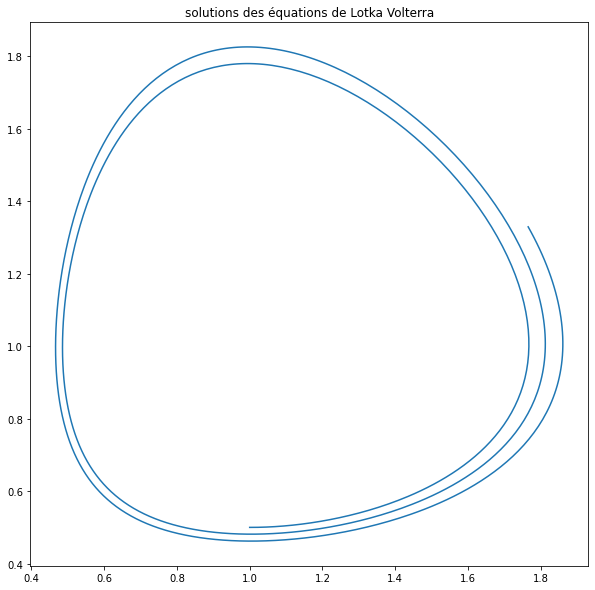

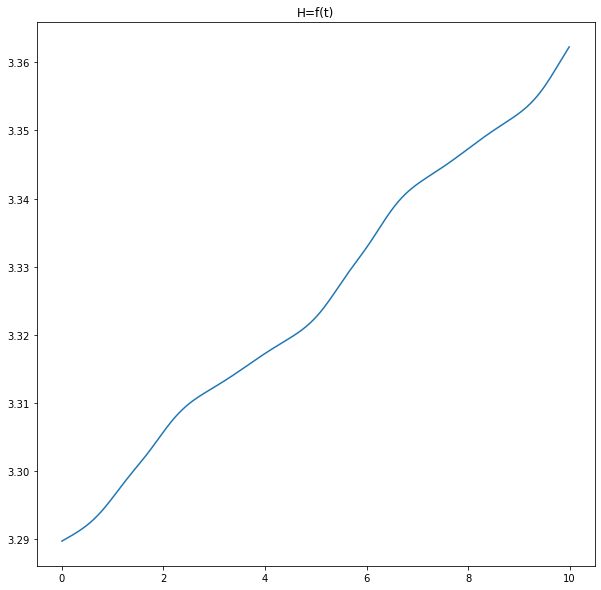

In [9]:
#tracé des solutions des équations de Lotka Volterra
T, x = solve_euler_explicit(f, [1, 0.5], 0.01, 0, 10)
x = x.transpose()
plt.plot(x[0], x[1]);
plt.title('solutions des équations de Lotka Volterra')
plt.show();

#tracé de H en fonction de t: le résultat doit être une constante
L = H(x[0], x[1])
L = L[:-1]
plt.plot(T, L);
plt.title('H=f(t)');

On observe que $H$ est proche d'être constante, mais est en fait légèrement croissante et diverge même à l'infini ! Il faut donc revoir le modèle.

#### Question 8

Coder maintenant une fonction du type *def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100)* donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

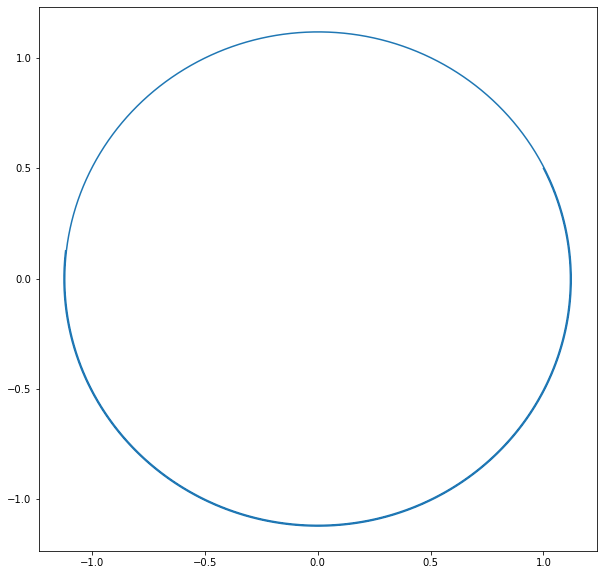

In [10]:
def Newton(F, x0, dt, eps=0.01, N=1000): #la fonction Newton pour la recherche du 0 dans le schéma d'Euler implicite
    V = np.array(x0)
    for i in range(N):
        V = V - np.dot(np.linalg.inv(J_f(x0[0], x0[1],dt)), F(x0)) #schéma de la méthode de Newton
        x, y = V[0], V[1]
        if np.sqrt((x - x0[0])**2 + (y - x0[1])**2) <= eps: 
            return (V)
        x0[0], x0[1] = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")
        
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    x = [x0]
    x0 = np.array(x0)
    T = np.arange(t0, tf, dt) #la liste des temps
    for tps in T:
        def fonc(x1):
            return np.array(x1 - x0 - dt*f(tps, x1)) #schéma d'Euler
        x1 = Newton(fonc, x0, dt) #dans le schéma implicite, on doit utiliser Newton car le terme en j+1 apparaît des 2 côtés
        x.append(x1)
        x0 = x1 #on réinitialise pour l'incrément suivant
    x = np.array(x)
    return T,x

# On choisit comme Q.6 un cercle:
def g(t, x):
    return np.array([x[1], -x[0]])

T, x = solve_euler_implicit(g, [1,0.5], 0.001, 0, 10)
x = x.transpose()
plt.plot(x[0], x[1]);

# Le résultat est beaucoup plus satisfaisant qu'avec Euler explicite au niveu de la vitesse de calcul !

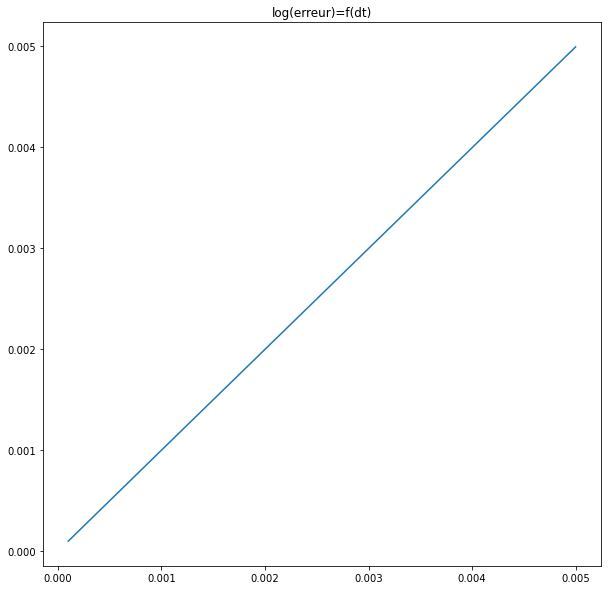

In [11]:
#Détermination de l'erreur: on utilise la même méthode que Q.6, pour le même résultat: un ordre de convergence de 1.

logerreur=[]
dt = [5*10**-3, 10**-3, 10**-4] 

for pas in dt:
    T, x = solve_euler_implicit(cercle, [1,0], pas, 0, 10) #on fixe arbitrairement le point de départ à (1,0)
    x0ref = x[0]
    x1ref = [] 
    for elt in x[0]: #pour chaque élément de la liste d'abscisses, on calcule l'ordonnée "théorique" correspondante
        x1ref.append(np.sqrt((1 - elt**2)))
    erreur = np.sqrt((x0ref[-1] - x[0][-1])**2 + (x1ref[-1] - x[1][-1])**2)
    logerreur.append(np.log(erreur))

plt.plot(dt, logerreur);
plt.title('log(erreur)=f(dt)');

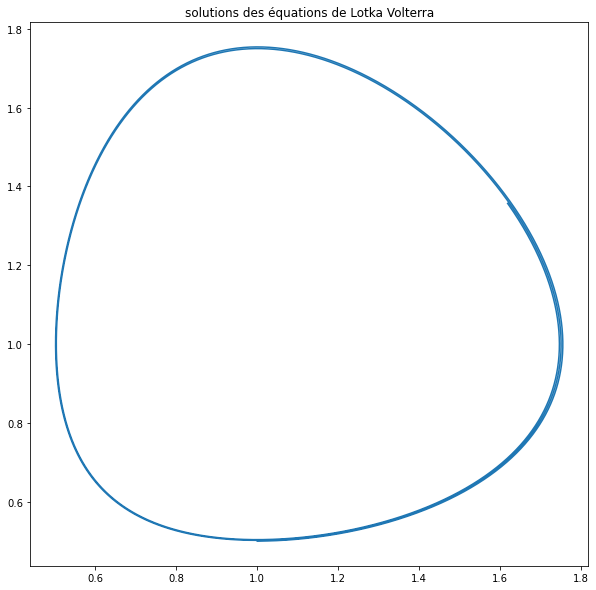

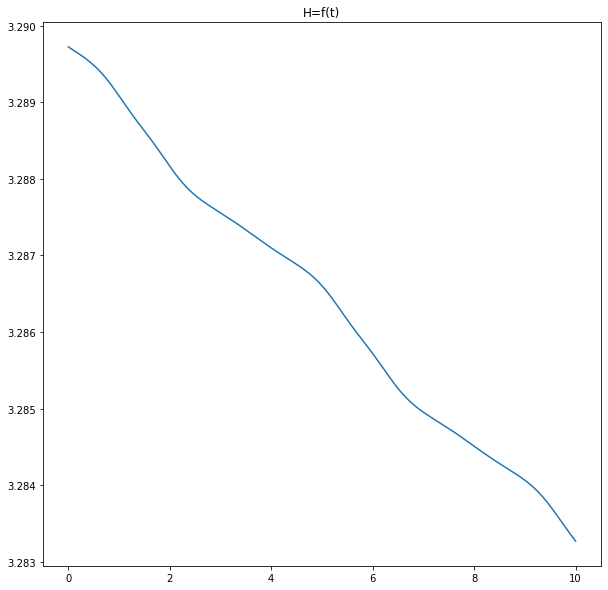

In [12]:
#tracé des solutions des équations de Lotka Volterra: id Q.7
T, x = solve_euler_implicit(f, [1, 0.5], 0.001, 0, 10)
x = x.transpose()
plt.plot(x[0], x[1]);
plt.title('solutions des équations de Lotka Volterra')
plt.show();

#tracé de H en fonction de t: le résultat doit être une constante.
L = H(x[0], x[1])
L = L[:-1]
plt.plot(T, L);
plt.title('H=f(t)');

Cette fois-ci, on n'a pas divergence mais décroissance vers l'équilibre de $H$. Mais encore une fois, ce n'est pas satisfaisant

#### Question 9

Expliquer pourquoi les solutions de
$\left \{
\begin{array}{rcl}
\dot{x}_1 &=& x_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)\\
\dot{x}_2 &=& -x_2(\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0)
\end{array}
\right. (L)$
sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u : \mathbb {R}^2 \to \mathbb{R}^2$ continûment différentiable.

##### Réponse

* Supposons que $x$ est solution de l'équation de Lotka-Volterra:
 
  $H$ est constante le long de la trajectoire. Ainsi, si $H_0 = H(x(0))$, $H(x_1,x_2)-H_0=0$ tout le long de la trajectoire, et les deux systèmes d'équations sont alors identiques quel que soit le choix de $u$.: ils ont donc bien les mêmes solutions.

* Supposons maintenant que $x$ est solution de $(L)$: 

  On définit $g:x\in\mathbb{R}^2\mapsto \begin{pmatrix}
x_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)\\
-x_2(\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0)
\end{pmatrix}$. $g=f-u(H(x_1,x_2)-H_0)$, or $f$ et $u$ sont continûment différentiables: par linéarité, on a donc $g$ continûment différentiable sur $\mathbb{R}^2$. Donc, d'après le *théorème de Cauchy-Lipschitz*, $\forall x\in\mathbb{R}^2$, il existe une unique solution maximale du système $(L)$ défini par $\dot{x}=g(x)$. 

  En particulier, on a vu précédemment que, si $H_0=H(x_1,x_2)$, une solution de l'équation de Lotka Volterra est nécessairement solution de $(L)$: par unicité, toute solution de $(L)$ est solution de l'éqaution de Lotka Volterra.

**Donc, les solutions de $(L)$ sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u : \mathbb {R}^2 \to \mathbb{R}^2$ continûment différentiable.**

#### Question 10

Soit $H_0 \in \mathbb{R}$. Calculer la dérivée de $H − H_0$ le long des solutions de ce nouveau système. Montrer que l’on peut choisir $u$ tel que $\frac{d}{dt}(H(x(t)) − H_0) = −k\Vert \nabla H(x(t))\Vert^2(H(x(t)) − H_0)$.

En déduire qu’alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l’infini si $x$ reste à une distance strictement positive de $\bar{x}$.

##### Réponse

* Par le même calcul qu'à la Q.4, on trouve $\frac{d}{dt}(H(x(t))-H_0)=\left (\delta-\frac{\gamma}{x_1}\right)\dot{x_1} + \left(\beta-\frac{\alpha}{x_2}\right)\dot{x_2}$ ; et en remplaçant avec le système d'équation donné Q.9, on obtient $\frac{d}{dt}(H(x(t))-H_0)= \underbrace{\left(\delta-\frac{\gamma}{x_1})\right)(\alpha -\beta x_2)x_1 - \left(\beta -\frac{\alpha}{x_2}\right)(\gamma -\delta x_1)x_2}_{=0} -(H(x(t))-H_0)\left[\left(\delta -\frac{\gamma}{x_1}\right)u_1(x(t))  -\left(\beta -\frac{\alpha}{x_2}\right)u_2(x(t))\right]$.

  Or, on a également $\nabla H(x_1,x_2)= \begin{pmatrix} 
\delta-\frac{\gamma}{x_1} \\
\beta - \frac{\alpha}{x_2}
\end{pmatrix}$, soit $\Vert \nabla H(x_1,x_2) \Vert ^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2$.

  Ainsi, si l'on choisit **$u$ colinéaire à $\Delta H$** , on a bien $\frac{d}{dt}(H(x(t)) − H_0) = −k\Vert \nabla H(x(t))\Vert^2(H(x(t)) − H_0)$.


* $x$ restant à distance strictement positive de $\bar{x}$, $\exists c\in\mathbb{R}^{+*}$ tq $\Vert\Delta H\Vert^2\geqslant c>0$. Ainsi, $\frac{d}{dt}(H(t)-H_0)\leqslant -kc^2(H(t)-H_0)$; puis en intégrant et par croissance de l'intégrale: $\log(\left|H(t)-H_0\right|)\leqslant -kc^2t$. Et on a finalement $\left|H(t)-H_0\right|\leqslant \underbrace{Ae^{-kct}}_{\underset{t\to+\infty}{\longrightarrow}0}$ en choisissant $k>0$.

  Ainsi, par encadrement, **$H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l’infini si $x$ reste à une distance strictement positive de $\bar{x}$**.

#### Question 11


En déduire comment modifier l’implémentation du schéma d’Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(x^{j+1}) − H(x_0)$ en fonction de $H(x^j) − H(x_0)$ au premier ordre en $dt$.

##### Réponse

Il suffit donc, pour assurer la stabilité de $H$, d'utiliser le système $(L)$ au lieu du système de Lotka Volterra, en prenant $u=k\nabla H$.

$k$ permet de faire converger $H$ vers $H_0$ rapidement (plus $k$ sera grand et plus la convergence sera rapide). Cependant, **on doit se limiter pour le choix de $k$**: $\frac{d}{dt}(H(x(t)) − H_0) = −k\Vert \nabla H(x(t))\Vert^2(H(x(t)) − H_0)$, et avec la formule du schéma d'Euler explicite on a $dH(x(t)) = (H(x^{j+1})-H_0)-(H(x^j)-H_0)$. On a donc directement l'expression au premier ordre en $dt$: $\fbox{$H(x^{j+1})-H_0 = \left(1-k \left \| \nabla H(x^j) \right \| ^2 dt \right) \left( H(x^j) - H_0 \right)$}$.

Ainsi, comme $H-H_0$ a un signe constant (convergence exponentielle), un $k$ trop grand (tel que $1 - k \left \| \nabla H(x_1, x_2) \right \| ^2 dt < 0$)  entraînerait un changement de signe à chaque itération.